## Local Interpretable Model-Agnostic Explanations (LIME)

Local Interpretable Model-agnostic Explanations (LIME) excels at explaining individual predictions. Imagine your complex image classifier has just confidently labeled a picture as ‘cat'. LIME helps us understand why this specific image led to a ‘cat' prediction and not ‘dog'. Instead of trying to open the inner workings of the entire classifier, LIME treats it as a black box function, _f(x)_. This function takes an image (represented by _x_) as input and outputs a probability for each category (i.e., ‘cat' and ‘dog'). LIME then observes how this output probability changes in response to subtle tweaks in the cat image, represented by new data points _x'_. These tweaks could involve masking out portions of the fur, blurring the background, or even changing the color of the cat's eyes.

LIME builds a simpler, interpretable model, often a linear regression model represented by _g(x)_. This simple model approximates the behavior of the original complex model, but only within the immediate space of our specific cat image (_x_). The goal is local fidelity. Here, fidelity means faithfulness – we want the simpler model to make similar predictions as the original model, but only for these slightly altered versions of the cat photo (represented by _x'_).

To achieve local fidelity, LIME minimizes the difference between the original model's output (_f(x')_) for the perturbed cat images (_x'_) and the simpler model's output (_g(x')_). This difference is quantified using a loss function, often the squared loss function:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <munder>
    <mtext>argmin</mtext>
    <mi>g</mi>
  </munder>
  <munder>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <msup>
        <mi>x</mi>
        <mo data-mjx-alternate="1">&#x2032;</mo>
      </msup>
    </mrow>
  </munder>
  <mo stretchy="false">[</mo>
  <mi>f</mi>
  <mo stretchy="false">(</mo>
  <msup>
    <mi>x</mi>
    <mo data-mjx-alternate="1">&#x2032;</mo>
  </msup>
  <mo stretchy="false">)</mo>
  <mo>&#x2212;</mo>
  <mi>g</mi>
  <mo stretchy="false">(</mo>
  <msup>
    <mi>x</mi>
    <mo data-mjx-alternate="1">&#x2032;</mo>
  </msup>
  <mo stretchy="false">)</mo>
  <msup>
    <mo stretchy="false">]</mo>
    <mn>2</mn>
  </msup>
</math>

The optimization process searches for the simplest model (_g(x)_) that best replicates the predictions of the complex model (_f(x')_) specifically when it comes to slight variations on our original cat image.

LIME incorporates weights (_wi_) for each perturbed cat image (_x'_). These weights reflect how similar a particular altered cat image is to the original (_x_). Images that closely resemble the original (like a slightly blurred version) get higher weights, making them more informative for the explanation. Kernel functions, such as the Gaussian kernel, are commonly used to assign these weights based on the distance (similarity) between the original image and the perturbed versions. Think of the Gaussian kernel like a bell curve – images very similar to the original are at the peak of the curve (high weight), while very different images get low weights in the tails. Here is the Gaussian kernel equation:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>w</mi>
    <mi>i</mi>
  </msub>
  <mo>=</mo>
  <mi>e</mi>
  <mi>x</mi>
  <mi>p</mi>
  <mo stretchy="false">[</mo>
  <mo>&#x2212;</mo>
  <mfrac>
    <mrow>
      <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
      <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
      <mi>x</mi>
      <mo>&#x2212;</mo>
      <msup>
        <mi>x</mi>
        <mo data-mjx-alternate="1">&#x2032;</mo>
      </msup>
      <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
      <msup>
        <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
        <mn>2</mn>
      </msup>
    </mrow>
    <msup>
      <mi>&#x3C3;</mi>
      <mn>2</mn>
    </msup>
  </mfrac>
  <mo stretchy="false">]</mo>
</math>

Where the standard deviation (_σ_) controls the width of the ‘bell curve'.

LIME often favors sparsity in the simpler model (_g(x)_). Sparsity means using as few features as possible for explanation. In the context of our cat image, this might mean identifying just the key regions (eyes, ears, fur pattern) that were most influential for the ‘cat' prediction. The L1-norm penalty is frequently used to get this sparsity, pushing coefficients of less important features towards zero. The L1-norm is calculated as:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
  <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
  <mi>g</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
  <msub>
    <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
    <mn>1</mn>
  </msub>
  <mo>=</mo>
  <munder>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mi>j</mi>
  </munder>
  <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
  <msub>
    <mi>&#x3B2;</mi>
    <mi>j</mi>
  </msub>
  <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
</math>

The complete objective function for LIME optimization combines these ideas into a single equation:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <munder>
    <mtext>argmin</mtext>
    <mi>g</mi>
  </munder>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <munder>
      <mo data-mjx-texclass="OP">&#x2211;</mo>
      <mrow data-mjx-texclass="ORD">
        <msup>
          <mi>x</mi>
          <mo data-mjx-alternate="1">&#x2032;</mo>
        </msup>
      </mrow>
    </munder>
    <msub>
      <mi>w</mi>
      <mi>i</mi>
    </msub>
    <mo>&#x2217;</mo>
    <mo stretchy="false">[</mo>
    <mi>f</mi>
    <mo stretchy="false">(</mo>
    <msup>
      <mi>x</mi>
      <mo data-mjx-alternate="1">&#x2032;</mo>
    </msup>
    <mo stretchy="false">)</mo>
    <mo>&#x2212;</mo>
    <mi>g</mi>
    <mo stretchy="false">(</mo>
    <msup>
      <mi>x</mi>
      <mo data-mjx-alternate="1">&#x2032;</mo>
    </msup>
    <mo stretchy="false">)</mo>
    <msup>
      <mo stretchy="false">]</mo>
      <mn>2</mn>
    </msup>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
  <mo>+</mo>
  <mi>&#x3BB;</mi>
  <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
  <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
  <mi>g</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
  <msub>
    <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
    <mn>1</mn>
  </msub>
</math>

Where the lambda (_λ_) controls the trade-off between fitting the complex model's behavior and achieving sparsity.

By solving this optimization problem, LIME produces a simple model (_g(x)_) that closely mimics how the original classifier responds to variations of our cat picture and helps us understand which parts of the image were most important for the ‘cat' decision.

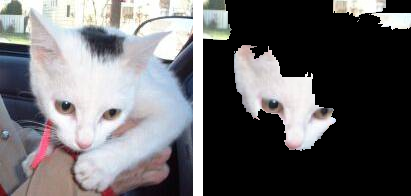

LIME has several advantages. It is model-agnostic, meaning it works with any kind of machine learning model regardless of the model's internal structure. Additionally, LIME produces human-friendly explanations by focusing on the most important features, aiding in understanding the reasoning behind a decision. Its focus on local fidelity helps us understand why a specific decision was made, not just general trends in the model. However, LIME also has some disadvantages. The simpler model only approximates the complex model's behavior locally, so the explanations might not generalize perfectly to other cases. LIME explanations can exhibit some instability, potentially changing them slightly if you re-run it with different settings. Finally, the process of generating perturbed data and optimizing the simpler model can sometimes be computationally intensive. For example, you will notice that LIME and SHAP (another method covered today), generally will take longer to run than gradient-based methods, such as vanilla and integrated gradients.

In [40]:
import os
import numpy as np
import tensorflow
import skimage as ski
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import concurrent.futures
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import MaxPooling2D, Dropout
from keras.optimizers import Adam
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from math import ceil
from time import time
import xplique
from xplique.attributions import IntegratedGradients
from xplique.plots import plot_attributions
import skimage.segmentation as seg
import skimage
import copy
import sklearn
from sklearn.linear_model import LinearRegression

In [41]:
# Folder paths where the images of each class are stored
folder_paths = ['cats_and_dogs/cats','cats_and_dogs/dogs']

# Class labels for the images (same order as folder_paths)
class_names = ["cats", 'dogs']

# Target size to resize the images
target_size = (224, 224)

# Arrays to store the images (X) and class labels (y)
X = []
y = []

for i in range(len(folder_paths)):
    for filename in os.listdir(folder_paths[i]):
        file_extension = os.path.splitext(filename)[1]
        # Check if the file extension is an image extension 
        if file_extension == ".jpg" or file_extension == ".jpeg" or file_extension == ".png": 
            image_filename = os.path.join(folder_paths[i], filename)
            # Read the image file using scikit-image
            image = ski.io.imread(image_filename)
            # Normalize the image to values between 0 and 1
            image = image / 255.0
            # Resize the image to the target_size
            image_resized = ski.transform.resize(image, target_size)            
            # Insert the image into array X
            X.append(image_resized)
            # Insert the class label into array y
            y.append(class_names[i])
            
# Convert of arrays into numpy arrays
X = np.array(X)
y = np.array(y)

In [42]:
data_gen = ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             zoom_range=0.2)

def GenerateImages(generator, image, num_images):
    new_images = []
    # we need to reshape the image because the generator.flow() 
    # expects an array of images
    image = np.reshape(image, (1,) + image.shape)
    for _ in range(num_images):
        batch = next(generator.flow(image, batch_size=1))
        new_images.append(batch[0])
    return np.array(new_images)

# Save the images to a new dataset 'X_augmented' and 'y_augmented'
X_augmented = []
y_augmented = []
for index in range(len(X)):
    images = GenerateImages(data_gen, X[index], 3)
    for i in range(3):
        X_augmented.append(images[i])
        y_augmented.append(y[index])  

# Convert lists to numpy arrays
X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)

# Encode the class labels into integers
label_encoder = LabelEncoder()
y_integer_encoded = label_encoder.fit_transform(y_augmented)  
num_classes = len(np.unique(y_integer_encoded))
y_onehot_encoded = keras.utils.to_categorical(y_integer_encoded, num_classes=num_classes)

In [43]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_augmented,
                                                    y_onehot_encoded,
                                                    test_size=1/10,
                                                    random_state=0)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size = 1/10,
                                                  random_state = 0)

In [44]:
# Create a sequential model
model = Sequential()

# Add convolutional layers, max pooling, and dropout layers
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=target_size + (3,), padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(10, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(10, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64))

# Output layer
model.add(Dense(2, activation='softmax'))

In [45]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define a callback to monitor val_accuracy
monitor_val_acc = EarlyStopping(monitor='val_accuracy', 
                       patience=3)

# Train the model 
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=monitor_val_acc)

Epoch 1/100
228/228 [==============================] - 47s 206ms/step - loss: 0.6681 - accuracy: 0.5857 - val_loss: 0.6515 - val_accuracy: 0.6198
Epoch 2/100
228/228 [==============================] - 49s 213ms/step - loss: 0.6221 - accuracy: 0.6465 - val_loss: 0.6066 - val_accuracy: 0.6654
Epoch 3/100
228/228 [==============================] - 48s 212ms/step - loss: 0.5777 - accuracy: 0.6937 - val_loss: 0.6096 - val_accuracy: 0.6568
Epoch 4/100
228/228 [==============================] - 52s 228ms/step - loss: 0.5083 - accuracy: 0.7421 - val_loss: 0.6943 - val_accuracy: 0.6580
Epoch 5/100
228/228 [==============================] - 66s 288ms/step - loss: 0.4048 - accuracy: 0.8092 - val_loss: 0.6890 - val_accuracy: 0.6457


### LIME implementation

### Predict class of input image
The model is used to predict the class of the image.

In [46]:
preds = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(preds, axis=1)
# Convert one-hot encoded true labels to class labels
y_true_labels = np.argmax(y_test, axis=1)

# Extract wrongly classified and correctly classified images
wrongly_classified_images = []
correctly_classified_images = []

for i in range(len(y_true_labels)):
    if y_pred_labels[i] != y_true_labels[i]:
        # Image is wrongly classified
        wrongly_classified_images.append(X_test[i])
    else:
        # Image is correctly classified
        correctly_classified_images.append(X_test[i])

# Convert lists to numpy arrays
wrongly_classified_images = np.array(wrongly_classified_images)
correctly_classified_images = np.array(correctly_classified_images)

# Print the number of wrongly classified and correctly classified images
print("Number of wrongly classified images:", len(wrongly_classified_images))
print("Number of correctly classified images:", len(correctly_classified_images))

29/29 [==============================] - 5s 161ms/step
Number of wrongly classified images: 307
Number of correctly classified images: 593


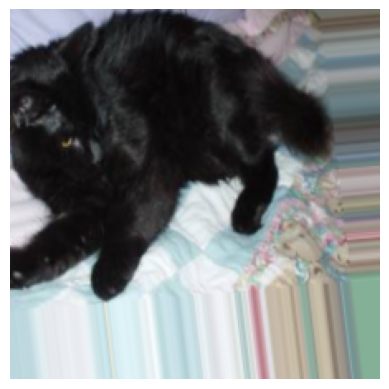

In [75]:
wrong = wrongly_classified_images[150]
right = correctly_classified_images[100]

# Display the wrongly classified image
plt.imshow(wrong)
plt.axis('off')
plt.show()

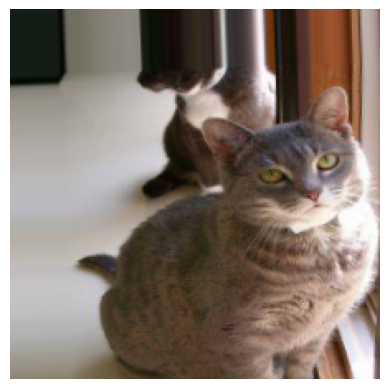

In [76]:
# Display the correctly classified image
plt.imshow(right)
plt.axis('off')
plt.show()

### _LIME explanations_
The following figure illustrates the basic idea behind LIME. The figure shows light and dark gray areas which are the decision boundaries for the classes for each (x1,x2) pairs in the dataset. LIME is able to provide explanations for the predictions of an individual record (blue dot). The  explanations are created by generating a new dataset of perturbations around the instance to be explained (colored markers around the blue dot). The output or class of each generated perturbation is predicted with the machine-learning model (colored markers inside and outside the decision boundaries). The importance of each perturbation is determined by measuring its distance from the original instance to be explained. These distances are converted to weights by mapping the distances to a zero-one scale using a kernel function (see color scale for the weights). All this information: the new generated dataset, its class predictions and its weights are used to fit a simpler model, such as a linear model (blue line), that can be interpreted. The attributes of the simpler model, coefficients for the case of a linear model, are then used to generate explanations.  
<img src="https://arteagac.github.io/blog/lime_image/img/lime_illustration.png" alt="LIME illustration" width="700">

A detailed explanation of each step is shown below.

### Step 1: Create perturbations of image
For the case of image explanations, perturbations will be generated by turning on and off some of the superpixels in the image.

#### Extract super-pixels from image
Superpixels are generated using the quickshift segmentation algorithm. It can be noted that for the given image, 34 superpixels were generated. The generated superpixels are shown in the image below.

In [77]:
superpixels = skimage.segmentation.quickshift(wrong, kernel_size=4,max_dist=200, ratio=0.2)
wrong_superpixels = np.unique(superpixels).shape[0]
wrong_superpixels

33

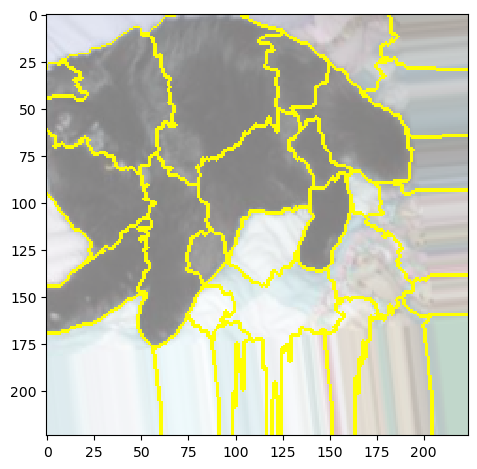

In [78]:
# Get superpixel segmentation for the wrongly classified image
superpixels = seg.quickshift(wrong, kernel_size=4, max_dist=200, ratio=0.2)

# Calculate the number of superpixels
wrong_superpixels = np.unique(superpixels).shape[0]

# Display the image with superpixel boundaries
skimage.io.imshow(skimage.segmentation.mark_boundaries(wrong/2+0.5, superpixels))


In [79]:
superpixels = skimage.segmentation.quickshift(right, kernel_size=4,max_dist=200, ratio=0.2)
right_superpixels = np.unique(superpixels).shape[0]
right_superpixels

38

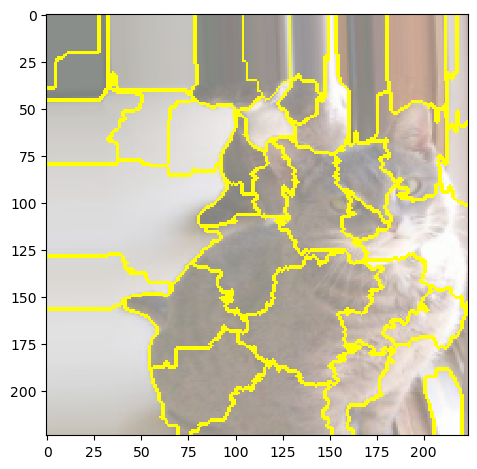

In [80]:
# Get superpixel segmentation for the wrongly classified image
superpixels = seg.quickshift(right, kernel_size=4, max_dist=200, ratio=0.2)

# Calculate the number of superpixels
right_superpixels = np.unique(superpixels).shape[0]

# Display the image with superpixel boundaries
skimage.io.imshow(skimage.segmentation.mark_boundaries(right/2+0.5, superpixels))


#### Create random perturbations
In this example, 150 perturbations were used. However, for real life applications, a larger number of perturbations will produce more reliable explanations. Random zeros and ones are generated and shaped as a matrix with perturbations as rows and superpixels as columns. An example of a perturbation (the first one) is show below. Here, `1` represent that a superpixel is on and `0` represents it is off. Notice that the length of the shown vector corresponds to the number of superpixels in the image.

In [81]:
num_perturb = 150
perturbations_wrong = np.random.binomial(1, 0.5, size=(num_perturb, wrong_superpixels))
perturbations_wrong[0] #Show example of perturbation

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [82]:
num_perturb = 150
perturbations_right = np.random.binomial(1, 0.5, size=(num_perturb, right_superpixels))
perturbations_right[0] #Show example of perturbation

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0])

The following function `perturb_image` perturbs the given image (`img`) based on a perturbation vector (`perturbation`) and predefined superpixels (`segments`).

In [83]:
def perturb_image(img,perturbation,segments):
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]
  return perturbed_image

Let's use the previous function to see what a perturbed image would look like:

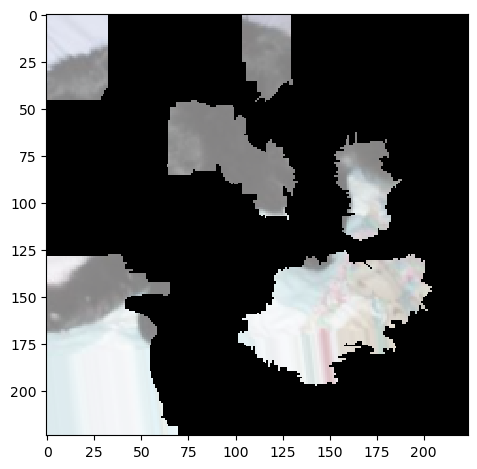

In [84]:
skimage.io.imshow(perturb_image(wrong/2+0.5,perturbations_wrong[0],superpixels))

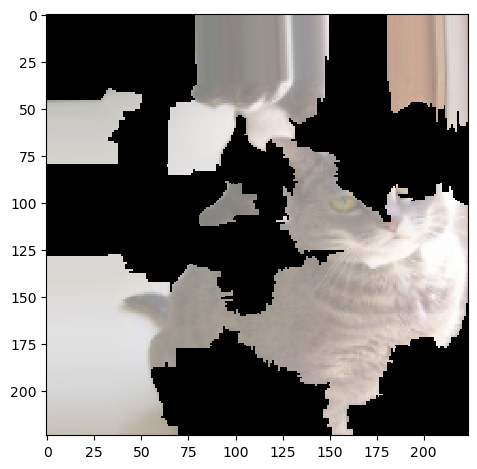

In [85]:
skimage.io.imshow(perturb_image(right/2+0.5,perturbations_right[0],superpixels))

### Step 2: Use ML classifier to predict classes of new generated images
This is the most computationally expensive step in LIME because a prediction for each perturbed image is computed. From the shape of the predictions we can see for each of the perturbations we have the output probability for each of the classes.

In [86]:
# Get superpixel segmentation for the wrongly classified image
superpixels = seg.quickshift(wrong, kernel_size=4, max_dist=200, ratio=0.2)

# Calculate the number of superpixels
wrong_superpixels = np.unique(superpixels).shape[0]

# Perform perturbations and collect predictions
predictions = []
for pert in perturbations_wrong:
    perturbed_img = perturb_image(wrong, pert, superpixels)
    pred = model.predict(perturbed_img[np.newaxis,:,:,:])
    predictions.append(pred)

predictions = np.array(predictions)
predictions.shape

1/1 [==============================] - 0s 14ms/step


(150, 1, 2)

In [87]:
# Get superpixel segmentation for the wrongly classified image
superpixels = seg.quickshift(right, kernel_size=4, max_dist=200, ratio=0.2)

# Calculate the number of superpixels
right_superpixels = np.unique(superpixels).shape[0]

# Perform perturbations and collect predictions
predictions = []
for pert in perturbations_right:
    perturbed_img = perturb_image(right, pert, superpixels)
    pred = model.predict(perturbed_img[np.newaxis,:,:,:])
    predictions.append(pred)

predictions = np.array(predictions)
predictions.shape

1/1 [==============================] - 0s 13ms/step


(150, 1, 2)

### Step 3: Compute distances between the original image and each of the perturbed images and compute weights (importance) of each perturbed image
The distance between each randomly generated perturnation and the image being explained is computed using the cosine distance. For the shape of the `distances` array it can be noted that, as expected, there is a distance for every generated perturbation.

In [88]:
original_image = np.ones(wrong_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled
distances = sklearn.metrics.pairwise_distances(perturbations_wrong,original_image, metric='cosine').ravel()
distances.shape

(150,)

In [89]:
original_image = np.ones(right_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled
distances = sklearn.metrics.pairwise_distances(perturbations_right,original_image, metric='cosine').ravel()
distances.shape

(150,)

#### Use kernel function to compute weights
The distances are then mapped to a value between zero and one (weight) using a kernel function. An example of a kernel function with different kernel widths is shown in the plot below. Here the x axis represents distances and the y axis the weights. Depeding on how we set the kernel width, it defines how wide we want the "locality" around our instance to be. This kernel width can be set based on expected distance values. For the case of cosine distances, we expect them to be somehow stable (between 0 and 1); therefore, no fine tunning of the kernel width might be required.

<img src="https://arteagac.github.io/blog/lime_image/img/kernel.png" alt="Drawing" width="800"/>

In [90]:
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
weights.shape

(150,)

### Step 4: Use `perturbations`, `predictions` and `weights` to fit an explainable (linear) model
A weighed linear regression model is fitted using data from the previous steps (perturbations, predictions and weights). Given that the class that we want to explain is labrador, when fitting the linear model we take from the predictions vector only the column corresponding to the top predicted class. Each coefficients in the linear model corresponds to one superpixel in the segmented image. These coefficients represent how important is each superpixel for the prediction of labrador.

In [92]:
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations_wrong, y=predictions[:,:,y_pred_labels[0]], sample_weight=weights)
coeff1 = simpler_model.coef_[0]
coeff1

array([-0.10510698,  0.11455375, -0.0454499 ,  0.06885679, -0.07357129,
       -0.04662275, -0.04080578, -0.21107151, -0.02984293, -0.04686736,
        0.02082375,  0.05252587, -0.04500864,  0.01607633,  0.07817972,
       -0.02441989, -0.07077802,  0.0499124 , -0.04839683, -0.11907915,
        0.13696342,  0.04384514, -0.0385525 ,  0.16879504,  0.12246701,
       -0.09049845, -0.08110945,  0.03597422, -0.01839804, -0.1199751 ,
        0.08804474,  0.06665636,  0.11559499])

In [93]:
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations_right, y=predictions[:,:,y_pred_labels[0]], sample_weight=weights)
coeff2 = simpler_model.coef_[0]
coeff2

array([ 0.02919552, -0.00328517,  0.04796379,  0.09377956,  0.07994904,
       -0.13668749, -0.04248831,  0.04258968, -0.03842615, -0.06842655,
        0.06641097,  0.00429562,  0.07296972,  0.10555056, -0.25329649,
        0.08761359,  0.0108417 , -0.02602846, -0.11732756,  0.02143228,
       -0.03095685,  0.10519658,  0.23793421, -0.06221436,  0.01263757,
        0.1001908 , -0.18178497,  0.1649326 , -0.05995346,  0.12489942,
       -0.11193008, -0.10395721,  0.14683319, -0.03204464, -0.07831665,
        0.04531138,  0.05489004, -0.0474396 ])

#### Compute top features (superpixels)
Now we just need to sort the coefficients to figure out which are the supperpixels that have larger coefficients (magnitude) for the prediction of cats/ dogs. The identifiers of these top features or superpixels are shown below. Even though here we use the magnitude of the coefficients to determine the most important features, other alternatives such as forward or backward elimination can be used for feature importance selection.

In [94]:
num_top_features = 4
top_features1 = np.argsort(coeff1)[-num_top_features:]
top_features1

array([32, 24, 20, 23])

In [95]:
num_top_features = 4
top_features2 = np.argsort(coeff2)[-num_top_features:]
top_features2

array([29, 32, 27, 22])

#### Show LIME explanation (image with top features)
Let's show the most important superpixels defined in the previous step in an image after covering up less relevant superpixels.

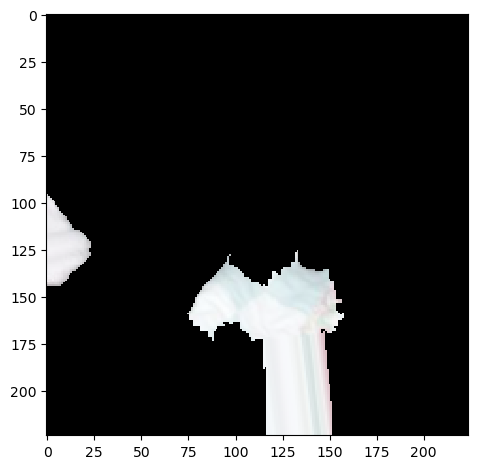

In [96]:
# Get superpixel segmentation for the wrongly classified image
superpixels = seg.quickshift(wrong, kernel_size=4, max_dist=200, ratio=0.2)

# Calculate the number of superpixels
wrong_superpixels = np.unique(superpixels).shape[0]

mask = np.zeros(wrong_superpixels)
mask[top_features1]= True #Activate top superpixels
skimage.io.imshow(perturb_image(wrong/2+0.5,mask,superpixels) )

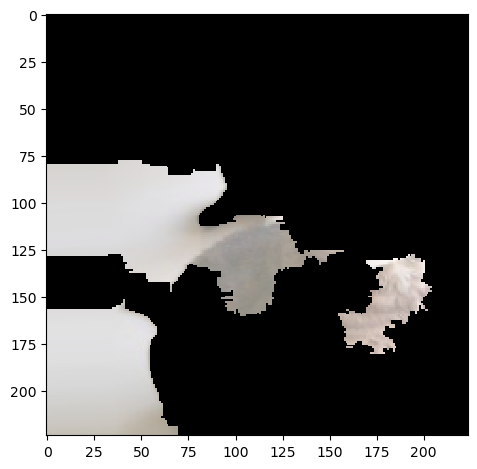

In [97]:
# Get superpixel segmentation for the wrongly classified image
superpixels = seg.quickshift(right, kernel_size=4, max_dist=200, ratio=0.2)

# Calculate the number of superpixels
right_superpixels = np.unique(superpixels).shape[0]

mask = np.zeros(right_superpixels)
mask[top_features2]= True #Activate top superpixels
skimage.io.imshow(perturb_image(right/2+0.5,mask,superpixels) )